## COMP5721M: Programming for Data Science 

## Group project (Coursework 2): Data Analysis Project


# Analysing mental health in the tech industry


_Give names and emails of group members here:_

* Stephen McGuinness, zmmh2430@leeds.ac.uk
* Yuchen Sun, xvws5109@leeds.ac.uk
* Xiao Tan, rdjl5698@leeds.ac.uk
* Yuanlin Zhou, psvh7734@leeds.ac.uk

# Project Requirements
_PLEASE DELETE THIS WHOLE CELL BEFORE SUBMITTING YOUR PROJECT_

The purpose of this assignment is to develop your skills
in organising and presenting a data analysis project.

Since most of the marks will be awarded for organisation
and presentation, it is suggested that you do not initially attempt
anything too complicated. However, once you have managed
to get a basic pipeline working that fits the guidelines, 
you are encouraged to extend and elaborate your analysis.

Your project should entirely be contained within this template file.
You should keep the basic structure indicated below. To facilitate
grading according to the marking scheme.

You _may_ import any module that is provided with Anaconda3 Python.


### Marking Scheme

The marking scheme  is as follows:

* Project Plan:
    * Description of data to be used (10)
    * Overview of Project Aims  (5)
    * Design  (5)
    
* Program Code: (15)<br>
    Code should be laid out in steps with explanations
    and intermediate output with comments. 
    You should ensure that the steps do not require
    a large amount of processing time.

* Project Outcome:
    * Explanation of Results (10)<br>
        This should include a qualitative description
        of the results as well as key figures and tables
        of results.
    * Results visualisation (10)<br>
        This should be graphical representations of the
        results with brief explanations (ordinary tables will be
        graded as part of the explanation of results)
    * Conclusion (5)

### Data Resources

You can use any data you like. Many useful resources are available.

The Data Resources section of the module (Unit 4.3 on Minerva) has links to several example data sets.

As a starting point you could browse the following:
* [Kaggle](https://www.kaggle.com/)
* [Our World in Data](https://ourworldindata.org/)
* [scikit-learn datasets](https://scikit-learn.org/stable/datasets.html)
* [scikit-learn tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)




### Using this Notebook Template
Please use this notebook as a template for your project file.
In the following cells of the notebook, _italic text_ giving explanations
and examples should be either deleted, or, in most cases, replaced by appropriate text describing your project. 
Text that is not in italic (which is mostly headings) should
be left as it is. __Your project report notebook should the same overall
structure as this template notebook.__
An exception to this is the current markup cell describing the project
requiements. You should delete this before submitting your notebook.

# Project Plan

## The Data (10 marks)

The dataset was collected from [Dataset on Kaggle](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data). The data is a survey on mental health in the workplace. It contains 27 columns and 1260 responses. The data contains varied columns and responses on mental health support, workplace culture and personal experience. Examples of which include data on demographics (age, gender, country), employment type (self-employed, company size) along with workplace mental health resources (benefits, wellness programs, leave policies). Moreover, the survey explores the respondent’s opinion on stigma, their comfort in discussing mental health – and their perceived consequences on disclosing their mental health 
The self-reported nature of this survey introduces several biases which may affect accuracy, e.g. sampling bias, cultural and language differences, ambiguity in survey questions and social desirability bias.

-	Sampling bias: Individuals responding may have stronger views or experiences (whether good or bad) skewing results. Those with less intense opinions or experiences, for example, may be unlikely to participate – meaning the dataset could overrepresent individuals with pronounced experiences (Bhandari, 2022). 
-	Social desirability bias: Respondents could answer these questions in a way where it positively reflects on themselves or align with cultural social norms – surrounding sensitive topics, such as mental health. This could then lead to underreporting of mental health challenges and overreporting on positive workplace experiences (Mathieu, 2021). 
-	Terminology: The clarity of the survey questions along with the terminology used may affect how respondents answer the question, e.g. ‘wellness program’ and ‘mental health resources’, respondents may interpret these two words differently.
-	Cultural and Language differences: Cultural attitudes towards mental health, workplace norm might vary based on cultural openness to mental health discussions – leading to inconsistent responses (Comms Multilingual, 2024). 
However, while self-reported data can introduce certain biases, the number of responses and the dataset’s depth and range provide foundational meaningful analysis on the trends and challenges – making it a valuable resource for exploring mental health factors and features in the tech workplace. 

## Project Aim and Objectives (5 marks)

The project aims to analyse mental health awareness and support in the tech industry across varied organisation sizes, e.g. small, medium and large via a limited but comprehensive sample set. By examining the responses on specific rows, such as mental health treatment plan, family history, company-provided benefits along with work place dynamics - the study seeks to identify how company size and demographic factors influence whether an employee feels comfort in discussing their mental health. These insights may aid in informing workplace policies by reducing stigma or through promoting support systems in tech environments. 

- Objective 1 (Yuchen Sun): Clean and process the limited data sample set, adressing missing values, inconsistencies in column specific areas, e.g. gender and age - in addition to dicussing the accuracy of the data set. 

- Objective 2 (Xiao Tan): Identify and visualize trends on mental health openness along with support across various company sizes, focusing on whether these trends differ by age, gender or by company type. 

- Objective 3 (Yuanlin Zhou): Train and evaluate classification models, e.g. KNN and logistic regression - to predict whether an employee are likely to seek mental health treatment based on specific features, e.g. work environment, demographic details, company support. The evaluation stage involves analysing the model's accuracy and precision to determine its effectiveness.

- Objective 4 (Stephen McGuinness): To aid in report writing and acting as the project's facilitator, e.g. ensuring individuals meet specific deadlines, version control etc. 

## System Design (5 marks)


### Architecture

![process](./image/process.drawio.png)

The overall architecture of the data process is illustrated in diagram. The process begins with identifying and solving outliers in the data. Next, the code applies feature engineering techniques to standardize gender labels and transform data where necessary. Following this, exploratory data analysis (EDA) is conducted, where data characteristics are visualized using bar charts, pie charts, and histograms to gain insights. In the model training and evaluation phase, some machine learning models, like Decision Tree and K-Nearest Neighbors, are trained on the preprocessed data. After completing the training, the models are evaluated based on accuracy. Finally, the results are displayed through visualization tools to help interpretation.

### Processing Modules and Algorithms

- Preprocess data: Fill missing values in "self_employed" and "state" columns with "Unknown" using Pandas.
- Encode categorical variables: Use LabelEncoder from sklearn.preprocessing to convert categorical values into numeric values for model compatibility.
- Model construction: Implement Decision Tree and K-Nearest Neighbors for data classification and analysis.


# Program Code (15 marks)

In [1209]:
# Import modules

# data processing
import pandas as pd
import numpy as np


# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# encoding data and scaling
from sklearn.preprocessing import LabelEncoder # encoding data
from sklearn.preprocessing import MinMaxScaler # scaling

# model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Input

# color dictionary
color_dict = {
    'Yes': '#CC8963',
    'No': '#5975A4',
    'Sometimes': '#5F9E6E',
    'Never': '#5975A4',
    'Rarely': '#CC8963',
    'Often': '#B55D60',
    "Don't know": '#5F9E6E',
    'Unknown': '#E3EDCD'
}

We use pandas to describe and analyze data, matplotlib and seaborn to visualize data, and sklearn for feature selection and data modeling.

## 1. Data Loading

In [918]:
# Loading the dataset
def get_original_data():
    file = './input/survey.csv'
    df = pd.read_csv(file)
    return df

df = get_original_data()

# The num of rows and columns of dataset
print("Data Shape:", df.shape)

# The type of columns
print(df.info())

Data Shape: (1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null

## 2. Data Cleaning

In [921]:
# Remove unused columns
df = df.drop(['Timestamp','Country','state','comments'], axis = 1)
df.head(5)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [923]:
# Check for null values in each column
columnStr = 'column'
mcStr = 'missing count'
print(f"{columnStr:<25} {mcStr}")

for col in df:
    missing_count = df[col].isnull().sum()
    print(f"{col:<30} {missing_count}")

column                    missing count
Age                            0
Gender                         0
self_employed                  18
family_history                 0
treatment                      0
work_interfere                 264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0


In [925]:
# Assign all empty values to 'NaN'
df['self_employed'] = df['self_employed'].fillna('NaN')
df['work_interfere'] = df['work_interfere'].fillna('NaN')
df.head(5)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [927]:
# Replace 'NaN' in 'self_employed' column
print(df['self_employed'].value_counts(), "\n")
df['self_employed'] = df['self_employed'].replace(['NaN'], 'No')

self_employed
No     1095
Yes     146
NaN      18
Name: count, dtype: int64 


In [929]:
# Replace 'NaN' in 'work_interfere' column
print(df['work_interfere'].value_counts())
df['work_interfere'] = df['work_interfere'].replace('NaN', 'Unknown')

work_interfere
Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


In [931]:
# Clean gender
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'male (cis)', 'cis man', 'Guy']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'female (cis)', 'cis woman']:
        return 'Female'
    elif 'trans' in gender and 'male' in gender:
        return 'transMale'
    elif 'trans' in gender and 'female' in gender:
        return 'transFemale'
    elif gender in ['non-binary', 'nonbinary', 'nb', 'genderqueer', 'gender fluid']:
        return 'Other'
    else:
        return 'Other'  # 将 unknown 和 Non-binary 归为 Other

df['Gender'] = df['Gender'].apply(clean_gender)
print(df['Gender'].value_counts())

Gender
Male         981
Female       244
Other         31
transMale      3
Name: count, dtype: int64


In [933]:
# Clean age
print("min age", df['Age'].min())
print("max age", df['Age'].max())

age_series = pd.Series(df['Age'])
age_median = age_series.median()
age_series[age_series <= 18] = age_median
age_series[age_series >= 100] = age_median
df['Age'] = age_series

print("min age", df['Age'].min())
print("max age", df['Age'].max())

min age -1726
max age 99999999999
min age 19
max age 72


## 3. Exploratory Data Analysis

Bar chart to show gender distribution

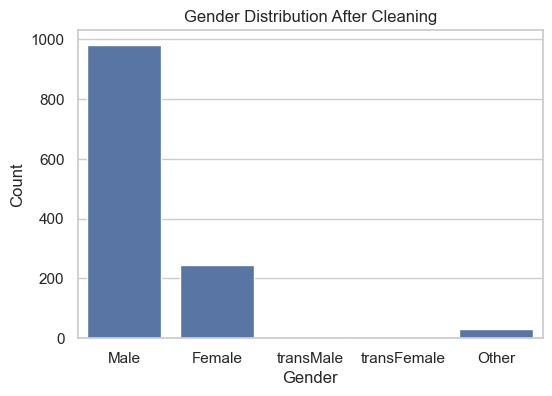

In [937]:
# Visualizing gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', order=['Male', 'Female', 'transMale', 'transFemale', 'Other'])
plt.title("Gender Distribution After Cleaning")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Histogram to show age distribution.

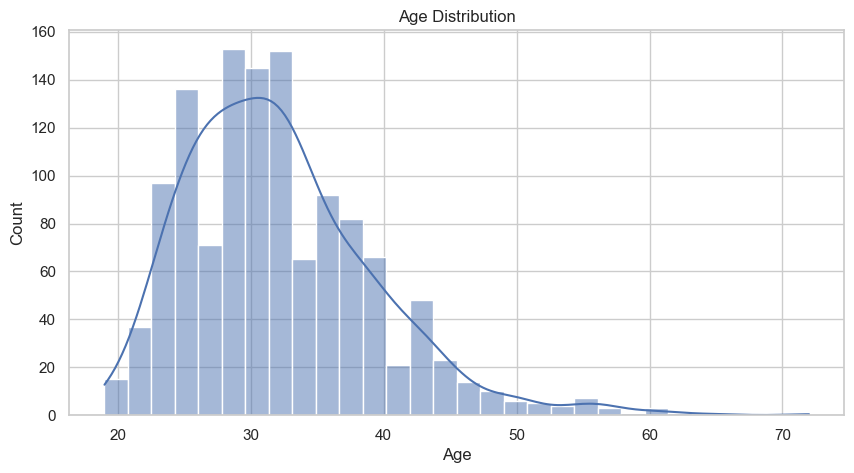

In [940]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
# Draw a histogram to show age distribution
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Count plot to show mental treatment uptake across different genders.

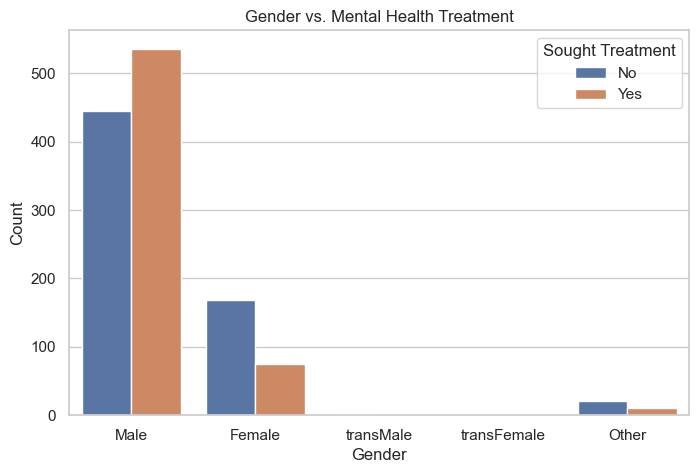

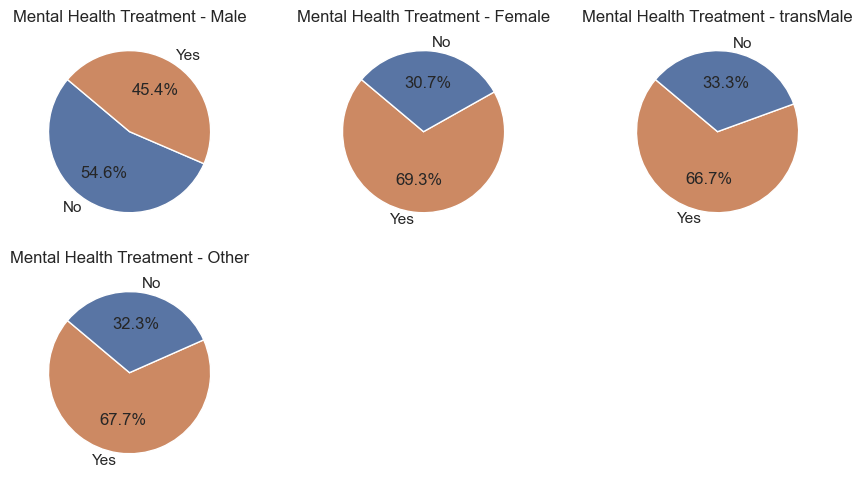

In [943]:
plt.figure(figsize=(8, 5))
# Draw a count plot to show mental treatment uptake across different genders.
sns.countplot(data=df, x='Gender', hue='treatment', order=['Male', 'Female', 'transMale', 'transFemale', 'Other'])
plt.title("Gender vs. Mental Health Treatment")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Sought Treatment", labels=["No", "Yes"])
plt.show()

gender_categories = ['Male', 'Female', 'transMale', 'Other'] # Ignore transFemale type because its count is 0
t_df = df[df['Gender'].isin(gender_categories)]
plt.figure(figsize=(9, 5))

# Traverse each gender category and create a subgraph
for i, gender in enumerate(gender_categories, 1):
    plt.subplot(2, 3, i)
    # Count the number of people who received and did not receive treatment in the current gender category
    treatment_counts = t_df[t_df['Gender'] == gender]['treatment'].value_counts()
    colors = [color_dict[label] for label in treatment_counts.index]
    # Draw a pie chart to show percentage of individuals within each gender who have and have not received treatment.
    plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Mental Health Treatment - {gender}")
plt.tight_layout()
plt.show()

Do people of different genders believe that mental health issues affect their work?

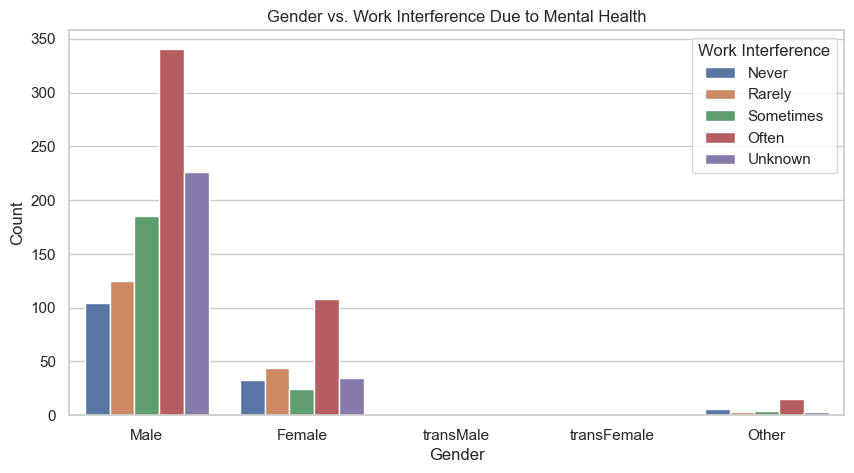

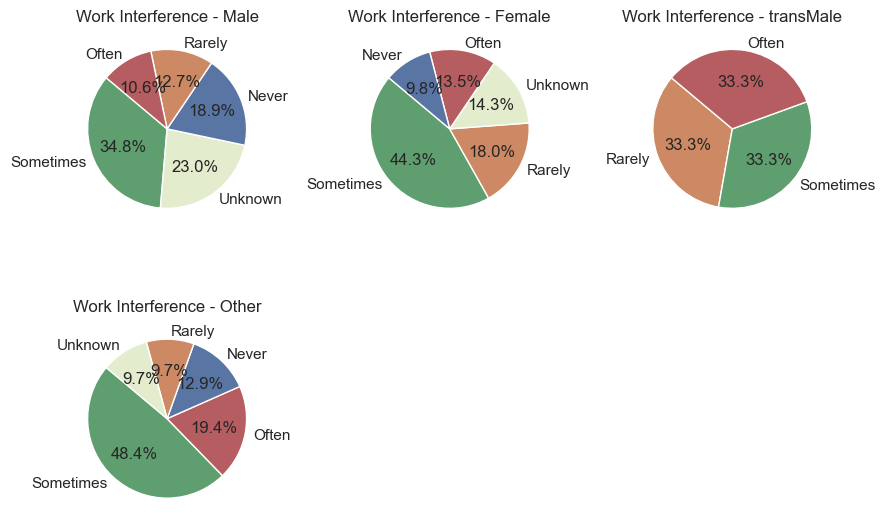

In [946]:
plt.figure(figsize=(10, 5))
# Draw a count plot to show the distribution of work interference across different genders
sns.countplot(data=df, x='Gender', hue='work_interfere', order=['Male', 'Female', 'transMale', 'transFemale', 'Other'])
plt.title("Gender vs. Work Interference Due to Mental Health")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Work Interference", labels=["Never", "Rarely", "Sometimes", "Often", 'Unknown'])
plt.show()

plt.figure(figsize=(9, 6))
for i, gender in enumerate(gender_categories, 1):
    plt.subplot(2, 3, i)
    # Count the distribution of people in the current gender category who think psychological problems interfere with their work
    interfere_counts = df[df['Gender'] == gender]['work_interfere'].value_counts()
    colors = [color_dict[label] for label in interfere_counts.index]
    # Draw a pie chart showing the percentage of each level of interference
    plt.pie(interfere_counts, labels=interfere_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Work Interference - {gender}")
plt.tight_layout()
plt.show()

Count plot shows the number of people receiving mental treatment in different age groups.

In [949]:
# Define the boundaries of age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

# Group the age column 'Age' by the defined boundaries and store the results in a new column 'age_group'
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

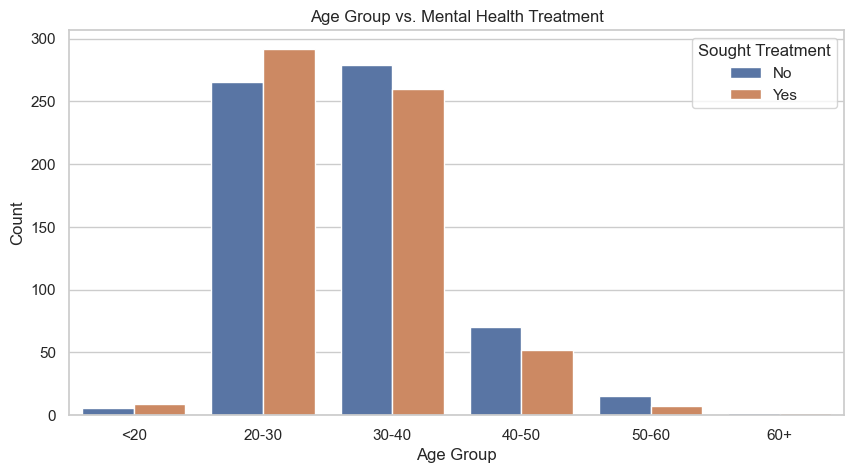

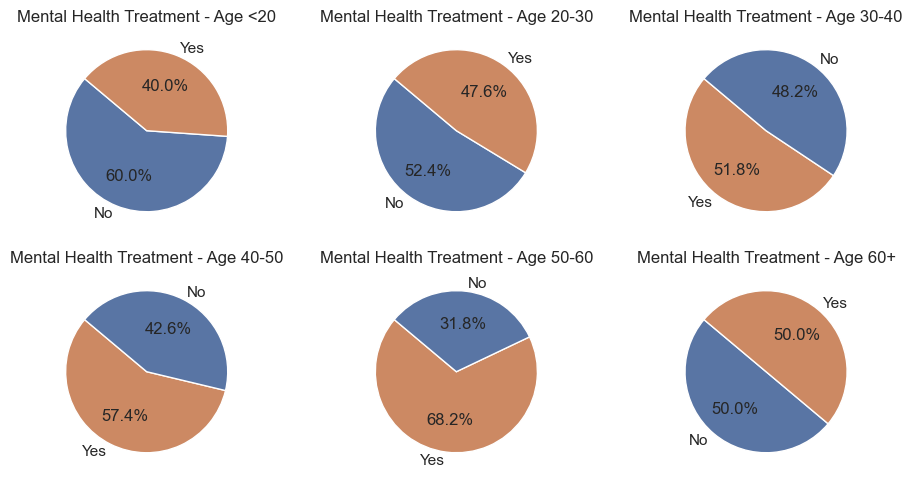

In [951]:
plt.figure(figsize=(10, 5))
# Create a count plot showing the number of treatments sought by age group
sns.countplot(data=df, x='age_group', hue='treatment')
plt.title("Age Group vs. Mental Health Treatment")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Sought Treatment", labels=["No", "Yes"])
plt.show()

plt.figure(figsize=(10, 5))
for i, age_group in enumerate(labels, 1):
    # Create a subplot for each age group
    plt.subplot(2, 3, i)
    # Count the number of treatments sought for the current age group
    treatment_counts = df[df['age_group'] == age_group]['treatment'].value_counts()
    colors = [color_dict[label] for label in treatment_counts.index]
    # Create the pie chart with percentage labels
    plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Mental Health Treatment - Age {age_group}")
plt.tight_layout()
plt.show()

Do people of different genders believe that mental health issues affect their work?

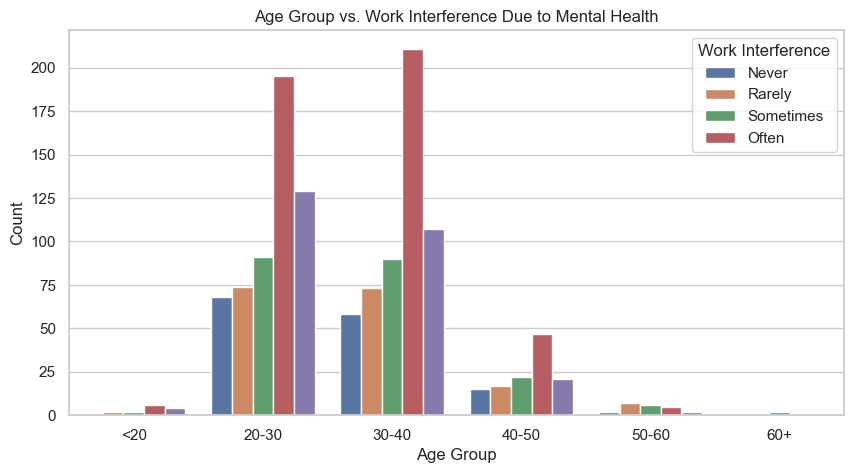

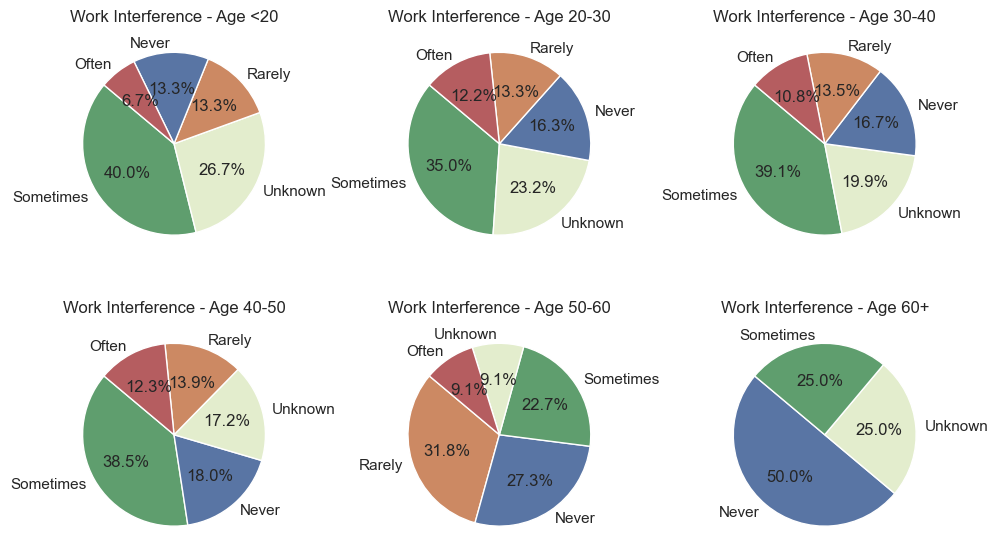

In [954]:
plt.figure(figsize=(10, 5))
# Draw a count plot to show the distribution of work interference across different ages
sns.countplot(data=df, x='age_group', hue='work_interfere')
plt.title("Age Group vs. Work Interference Due to Mental Health")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Work Interference", labels=["Never", "Rarely", "Sometimes", "Often"])
plt.show()

plt.figure(figsize=(10, 6))
for i, age_group in enumerate(labels, 1):
    plt.subplot(2, 3, i)
    interfere_counts = df[df['age_group'] == age_group]['work_interfere'].value_counts()
    colors = [color_dict[label] for label in interfere_counts.index]
    plt.pie(interfere_counts, labels=interfere_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Work Interference - Age {age_group}")
plt.tight_layout()
plt.show()

Count plot shows company size and whether it has mental health benefits.

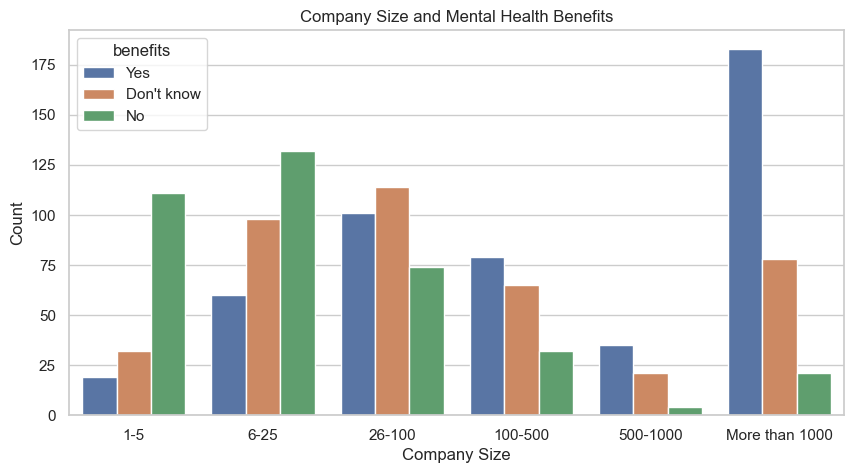

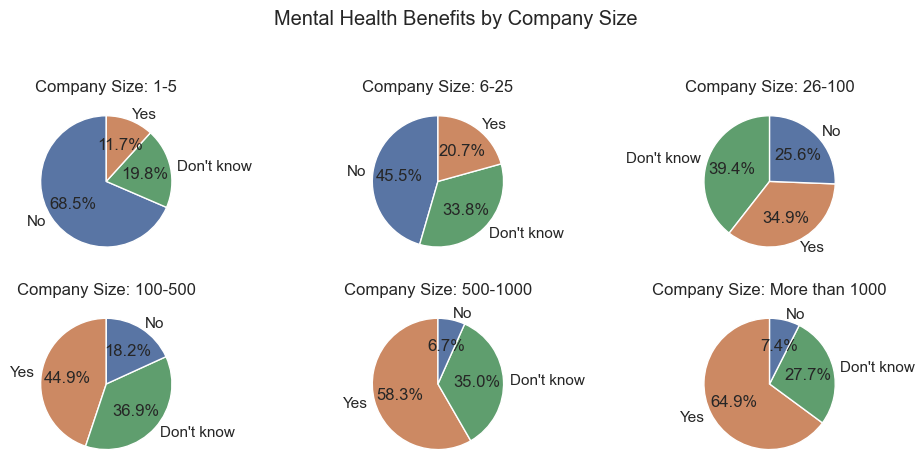

In [957]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='no_employees', hue='benefits', order=employee_order)
plt.title("Company Size and Mental Health Benefits")
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()
fig, axes = plt.subplots(2, 3, figsize=(10, 5))  # Adjust grid size based on the number of categories
fig.suptitle("Mental Health Benefits by Company Size")

# Loop through each company size and create a pie chart for the distribution of benefits
for i, size in enumerate(employee_order):
    # Filter data for the current company size
    data_size = df[df['no_employees'] == size]

    # Get the counts for each category in 'benefits'
    benefit_counts = data_size['benefits'].value_counts()
    colors = [color_dict[label] for label in benefit_counts.index]

    # Select subplot position
    ax = axes[i // 3, i % 3]
    ax.pie(benefit_counts, labels=benefit_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(f"Company Size: {size}")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Make space for the main title
plt.show()


The relationship between family history and mental health treatment.

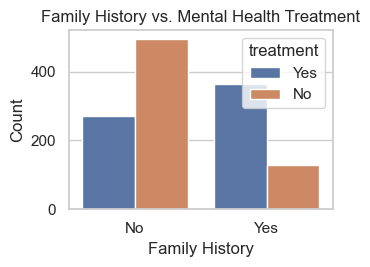

In [960]:
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='family_history', hue='treatment')
plt.title("Family History vs. Mental Health Treatment")
plt.xlabel("Family History")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

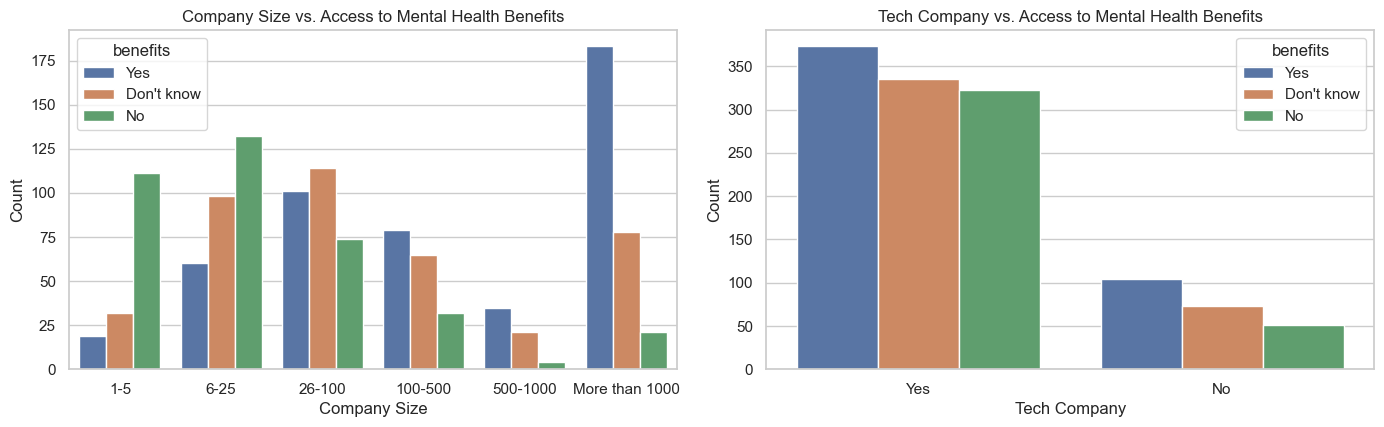

In [962]:
plt.figure(figsize=(14, 8))

# Relationship between company size and access to mental health benefits

employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='no_employees', hue='benefits', order=employee_order)
plt.title("Company Size vs. Access to Mental Health Benefits")
plt.xlabel("Company Size")
plt.ylabel("Count")

# Relationship between tech company status and access to mental health benefits
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='tech_company', hue='benefits')
plt.title("Tech Company vs. Access to Mental Health Benefits")
plt.xlabel("Tech Company")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

## 4. Encoding Data

In [1314]:
# Create a copy of cleaned dataset
train_df = df.copy()
# Store the mapping between column value and encoded data
encoded_value_mapping = {}

for col in train_df:
    label_encoder = LabelEncoder()
    label_encoder.fit(train_df[col])
    # Assgin encoded data to df
    train_df[col] = label_encoder.transform(train_df[col])
    encoded_value_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

train_df.head(5)
for k, v in encoded_value_mapping.items():
    print(k, v)

Age {19: 0, 20: 1, 21: 2, 22: 3, 23: 4, 24: 5, 25: 6, 26: 7, 27: 8, 28: 9, 29: 10, 30: 11, 31: 12, 32: 13, 33: 14, 34: 15, 35: 16, 36: 17, 37: 18, 38: 19, 39: 20, 40: 21, 41: 22, 42: 23, 43: 24, 44: 25, 45: 26, 46: 27, 47: 28, 48: 29, 49: 30, 50: 31, 51: 32, 53: 33, 54: 34, 55: 35, 56: 36, 57: 37, 58: 38, 60: 39, 61: 40, 62: 41, 65: 42, 72: 43}
Gender {'Female': 0, 'Male': 1, 'Other': 2, 'transMale': 3}
self_employed {'No': 0, 'Yes': 1}
family_history {'No': 0, 'Yes': 1}
treatment {'No': 0, 'Yes': 1}
work_interfere {'Never': 0, 'Often': 1, 'Rarely': 2, 'Sometimes': 3, 'Unknown': 4}
no_employees {'1-5': 0, '100-500': 1, '26-100': 2, '500-1000': 3, '6-25': 4, 'More than 1000': 5}
remote_work {'No': 0, 'Yes': 1}
tech_company {'No': 0, 'Yes': 1}
benefits {"Don't know": 0, 'No': 1, 'Yes': 2}
care_options {'No': 0, 'Not sure': 1, 'Yes': 2}
wellness_program {"Don't know": 0, 'No': 1, 'Yes': 2}
seek_help {"Don't know": 0, 'No': 1, 'Yes': 2}
anonymity {"Don't know": 0, 'No': 1, 'Yes': 2}
leave 

## 5. Feature Scaling

Age is different from other columns, needs to be scaled.

In [1318]:
scaler = MinMaxScaler()

# scaling Age
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head(5)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group
0,0.418605,0,0,0,1,1,4,0,1,2,...,2,1,1,1,2,1,0,2,0,1
1,0.581395,1,0,0,0,2,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.302326,1,0,0,0,2,4,0,1,1,...,1,1,1,2,2,2,2,1,0,1
3,0.279070,1,0,1,1,1,2,0,1,1,...,1,2,2,1,0,0,0,1,1,1
4,0.279070,1,0,0,0,0,1,1,1,2,...,0,1,1,1,2,2,2,0,0,1


## 6.Model Training and Evaluation

### Feature Selection

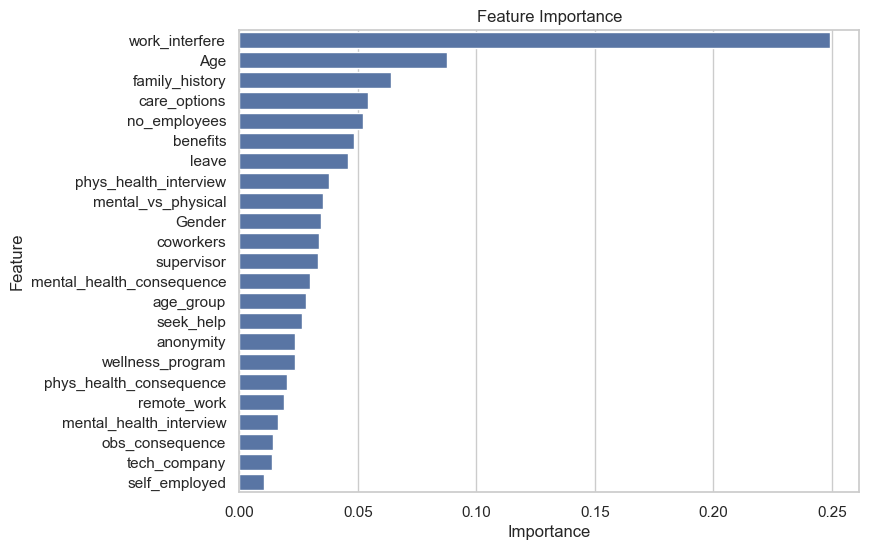

In [1322]:
X = train_df.drop('treatment', axis=1)
y = train_df['treatment']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=88)

# Train random forest model
rf_model = RandomForestClassifier(random_state=88)
rf_model.fit(X_train, y_train)

# Evaluate feature importance
importances = rf_model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

Select features based on feature importance.

In [1325]:
# Select features
X = train_df[['work_interfere', 'family_history', 'care_options', 'Age', 'no_employees', 'leave', 'benefits', 'Gender']]
y = train_df[['treatment']].values.ravel()
X

,work_interfere,family_history,care_options,Age,no_employees,leave,benefits,Gender
0,1,0,1,0.418605,4,2,2,0
1,2,0,0,0.581395,5,0,0,1
2,2,0,0,0.302326,4,1,1,1
3,1,1,2,0.279070,2,1,1,1
4,0,0,0,0.279070,1,0,2,1
...,...,...,...,...,...,...,...,...
1254,4,0,0,0.162791,2,2,1,1
1255,1,1,2,0.302326,2,1,2,1
1256,3,1,2,0.348837,5,1,2,1
1257,4,0,2,0.627907,1,0,1,0


### Model Evaluation

The treatment column has only two values, 0 and 1, thus we use decision trees, knn, and other machine learning models suitable for binary classification models.

In [1329]:
# Models need to be evaluated
models = {
    "Decision Tree" : DecisionTreeClassifier(min_samples_split=8, max_features=8, min_samples_leaf=8),
    "KNN" : KNeighborsClassifier(n_neighbors=17),
    "Logistic Regression": LogisticRegression(),
    "SVC" : SVC(kernel='rbf', random_state=88)
}
# Store model name -> model accuracy 
model_accuracy = {}

def evaluate_models(X, y):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

    # Feature standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predict_result = model.predict(X_test)
        accuracy = accuracy_score(y_test, predict_result)
        model_accuracy[model_name] = accuracy
        print("Build", model_name, "model success!")

    # evaluate neural network model
    neural_network_accuracy = predict_by_neural_network()
    model_accuracy["Neural Network"] = neural_network_accuracy

Create a neural networks model.

In [1332]:
# Neural Networks Model
# Use Sequential model
def predict_by_neural_network():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    # Sigmoid is suitable for the output layer of the binary classification problem
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile and train neural network model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Use binary_crossentropy
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)
    
    predict_result = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, predict_result)
    print("Build neural networks model success!")
    return accuracy

Evaluate all models.

In [1335]:
evaluate_models(X, y)

Build Decision Tree model success!
Build KNN model success!
Build Logistic Regression model success!
Build SVC model success!
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.4951 - loss: 0.7829
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5670 - loss: 0.6800
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.6129 - loss: 0.6375
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.6600 - loss: 0.6310
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.6450 - loss: 0.6466
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.6856 - loss: 0.6036
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.6731 - loss: 0.6066
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.6957 - loss: 0.5839
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.7139 - loss: 0.5816
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.7161 - loss: 0.5895
Epoch 11/50
3

Visualizing model prediction results.

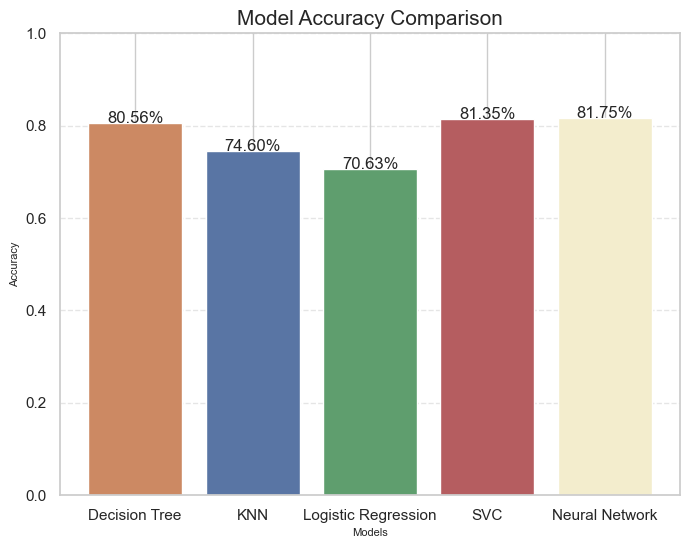

In [1309]:
# Get model name and accuracy
models = list(model_accuracy.keys())
scores = list(model_accuracy.values())

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, scores, color=['#CC8963','#5975A4','#5F9E6E','#B55D60','#F3EDCD'])
plt.title('Model Accuracy Comparison', fontsize=15)
plt.xlabel('Models', fontsize=8)
plt.ylabel('Accuracy', fontsize=8)
plt.ylim(0, 1)

# Add value labels to column
for i, score in enumerate(scores):
    plt.text(i, score, f'{score * 100.0:.2f}%', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

It can be seen that the prediction accuracies of the decision tree, support vector machine, and neural network models are all above 80%, showing good prediction performance. In contrast, the prediction accuracies of the logistic regression and KNN models fall between 70% and 80%.

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

Data cleaning:
This section outlines the data cleaning steps applied to the original survey dataset, which includes information on mental health in the workplace. The objective was to standardize, clean, and preprocess the data to ensure accuracy for further analysis. Some details are as follows.

1.	After reloaded the dataset (1259 rows, 27 columns) removed the columns were not necessary for analysis like 'Timestamp', 'Country', 'state', and 'comments'.
2.	Handing missing values. Initially coding the function to find the missing column, missing values repalced or filled with ‘Unknow’, ‘NaN’, ‘No’.
3.	Cleaned the "Gender" column by standardizing varied gender entries into categories (Male, Female, transMale, transFemale, and Other). 
4.	This code identifies and removes outliers in the "Age" column using the Interquartile Range (IQR) method to ensure a more accurate dataset for analysis. The specific method involves calculating the upper and lower bounds, treating any values below the lower bound or above the upper bound as outliers, thus cleaning the dataset to ensure the accuracy of the analysis.
Briefly, these cleaning steps resulted in a refined dataset, which is now ready for further analysis and modeling.

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

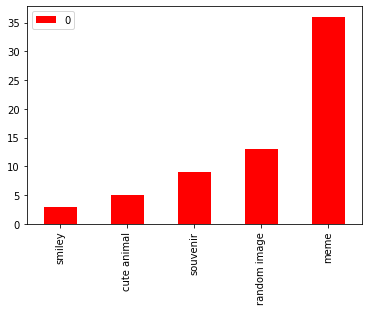

In [32]:
fridge_sorted_bar(color='red')

## Objective 2
### Explanation of Results

200-400 Words

### Visualisation

## Objective 3
### Explanation of Results

200-400 Words

### Visualisation

## Objective 4 
### Explanation of Results

200-400 Words

### Visualisation

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### References

Mathieu, C. (2021). Performance appraisal. Elsevier eBooks, [online] pp.71–96. doi:https://doi.org/10.1016/b978-0-12-815827-2.00004-1.


Bhandari, P. (2022). Sampling Bias and How to Avoid It | Types & Examples. [online] Scribbr. Available at: https://www.scribbr.co.uk/bias-in-research/sampling-bias-explained/ [Accessed 14 Nov. 2024].


Comms Multilingual. (2024). The impact of cultural and linguistic differences on test fairness | Comms Multilingual. [online] Available at: https://www.commsmultilingual.com/comms-news-blog/the-impact-of-cultural-and-linguistic-differences-on-test-fairness/ [Accessed 14 Nov. 2024].


### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._